In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [2]:
%matplotlib inline
# fix random seed for reproducibility
numpy.random.seed(1)
tf.random.set_seed(1)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input and output variables
X = dataset[:,0:8]
Y = dataset[:,8]

<h2>Part B-1</h2>

Epoch 1/12
3/3 [==============================] - 1s 78ms/step - loss: 20.4645 - acc: 0.4650 - val_loss: 3.3652 - val_acc: 0.6732
Epoch 2/12
3/3 [==============================] - 0s 16ms/step - loss: 2.5585 - acc: 0.6401 - val_loss: 0.7559 - val_acc: 0.6732
Epoch 3/12
3/3 [==============================] - 0s 18ms/step - loss: 0.7042 - acc: 0.6381 - val_loss: 0.7017 - val_acc: 0.6063
Epoch 4/12
3/3 [==============================] - 0s 19ms/step - loss: 0.6744 - acc: 0.6226 - val_loss: 0.7016 - val_acc: 0.6220
Epoch 5/12
3/3 [==============================] - 0s 23ms/step - loss: 0.6729 - acc: 0.6012 - val_loss: 0.7256 - val_acc: 0.6102
Epoch 6/12
3/3 [==============================] - 0s 19ms/step - loss: 0.6781 - acc: 0.5992 - val_loss: 0.6944 - val_acc: 0.6575
Epoch 7/12
3/3 [==============================] - 0s 19ms/step - loss: 0.6593 - acc: 0.6401 - val_loss: 0.7065 - val_acc: 0.6614
Epoch 8/12
3/3 [==============================] - 0s 19ms/step - loss: 0.6595 - acc: 0.6479 - va

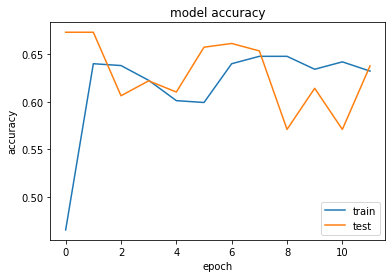

In [15]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=12, batch_size=240, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Epoch 1/100
1/1 [==============================] - 1s 613ms/step - loss: 1.5107 - acc: 0.6401 - val_loss: 3.9490 - val_acc: 0.3228
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 3.7458 - acc: 0.3580 - val_loss: 2.8933 - val_acc: 0.6732
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 3.0921 - acc: 0.6401 - val_loss: 0.8000 - val_acc: 0.4409
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 0.7851 - acc: 0.4105 - val_loss: 0.7358 - val_acc: 0.6063
Epoch 5/100
1/1 [==============================] - 0s 47ms/step - loss: 0.7083 - acc: 0.5875 - val_loss: 0.7180 - val_acc: 0.6102
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 0.6982 - acc: 0.5817 - val_loss: 0.7087 - val_acc: 0.6142
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6926 - acc: 0.5817 - val_loss: 0.7035 - val_acc: 0.6142
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 0.6896 - acc: 0.5

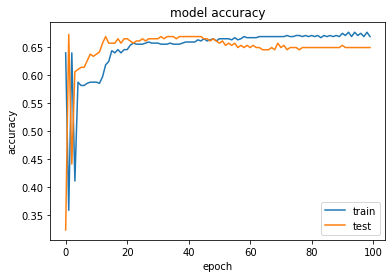

In [121]:
# fix random seed for reproducibility
numpy.random.seed(1)
tf.random.set_seed(1)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=600, verbose=1, shuffle=True)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

<h2>Part B-2</h2>

In [125]:
# Should normalize here
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cvscores = []
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(48, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
    
    # Fit the model
    model.fit(X[train], Y[train], epochs=100, verbose=0)
    
    # evaluate the model (verbose=0 removes print out)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    
print("Overall Accuracy :  %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

acc: 63.64%
acc: 74.03%
acc: 63.64%
acc: 74.03%
acc: 75.32%
acc: 76.62%
acc: 64.94%
acc: 62.34%
acc: 67.11%
acc: 59.21%
Overall Accuracy :  68.09% (+/- 5.98%)


<h2>Part 3</h2>

Epoch 1/1000
24/24 [==============================] - 1s 14ms/step - loss: 0.8719 - acc: 0.6055
Epoch 2/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.6343 - acc: 0.6432
Epoch 3/1000
24/24 [==============================] - 0s 13ms/step - loss: 0.6188 - acc: 0.6797
Epoch 4/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6274 - acc: 0.6589
Epoch 5/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6120 - acc: 0.6641
Epoch 6/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6060 - acc: 0.6758
Epoch 7/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6044 - acc: 0.6823
Epoch 8/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.6039 - acc: 0.6797
Epoch 9/1000
24/24 [==============================] - 0s 12ms/step - loss: 0.5929 - acc: 0.6758
Epoch 10/1000
24/24 [==============================] - 0s 16ms/step - loss: 0.5962 - acc: 0.6836
Epoch 11/1000
24/24 [==================

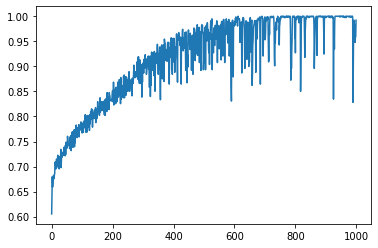

In [5]:
# fix random seed for reproducibility
numpy.random.seed(1)
tf.random.set_seed(1)
# create model
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(512, input_dim=8, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(8128, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

# Fit the model
results = model.fit(X, Y, epochs=1000)


# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
plt.plot(results.history["acc"])
plt.show()